# Tutorial de Ficha tecnica Automatica para portafolio de acciones (en python).

## En primer lugar ¿Que es una ficha tecnica?

Una ficha técnica para un [portafolio de inversión](https://tyba.pe/blog/portafolio-de-inversiones/) es un documento que proporciona una descripción detallada de los elementos clave del portafolio, diseñado para facilitar su análisis y evaluación. Su objetivo principal es ofrecer información clara, precisa y accesible a los inversionistas, gestores y otras partes interesadas sobre las características del portafolio y su desempeño.

En terminos generales, una ficha tecnica suele contener la siguiente información:

1. Composición del portafolio

* Fecha de inicio o creación.
* Desglose de activos (acciones, bonos, derivados, efectivo, etc.).
* Principales posiciones o inversiones destacadas.

2. Indicadores de desempeño:
* Rendimiento histórico (por ejemplo, rendimiento mensual, anual y acumulado).
* Rentabilidad comparada con un índice de referencia (benchmark).
* Ratios de riesgo-retorno como el Sharpe, Sortino o alfa.

3. Riesgos asociados:
* Volatilidad histórica.
* Exposición a riesgos específicos (tasa de interés, mercado, crédito, etc.).

## Proposito del tutorial:
El propósito de este tutorial es abordar la creación de un informe automatizado de ficha técnica para un portafolio de inversión. Este informe será capaz de actualizarse dinámicamente, ajustando la fecha de impresión a la más actual o a cualquier fecha deseada, según sea necesario. Además, estará diseñado para manejar cualquier cantidad y ponderación de acciones, adaptándose a la estructura específica del portafolio, así como a cualquier fecha de inversión inicial seleccionada. 


## Liberias Utilizadas.
Este tutorial se construyo utilizando las siguientes librerias.
* `pandas`: Manipulación y análisis eficiente de datos estructurados en tablas y series temporales.  
* `python-docx`: Creación y edición programática de documentos de Microsoft Word (.docx).  
* `yfinance`: Descarga de datos financieros y de mercado directamente desde Yahoo Finance.  
* `matplotlib`: Visualización de datos mediante gráficos estáticos, interactivos y personalizables.  

### Instalación 
A continuación se ejemplificará la instalación de las librerías mediante diferentes formas. Estas librerías mencionadas anteriormente no suelen cambiar en la forma de instalación según los diferentes sistemas operativos (MAC/WINDOWS/LINUX). Sencillamente, se listarán varias formas para que el usuario conozca las diferentes opciones de instalación en caso de que alguna no le funcione adecuadamente. Se recomienda ejecutar las siguientes lineas de codigo presentadas de manera individual.

#### pip install:
 
* `pip install pandas`
* `pip install python-docx`
* `pip install yfinance`
* `pip install matplotlib`

#### !pip install:
* `!pip install pandas`
* `!pip install python-docx`
* `!pip install yfinance`
* `!pip install matplotlib`

#### conda install: 
* `conda install pandas`
* `conda install python-docx`
* `conda install yfinance`
* `conda install matplotlib`

A continuación el siguiente bloque de codigo importara las librerias correspondientes.

In [33]:
import pandas as pd
from docx import Document
import matplotlib.pyplot as plt
import yfinance as yf
import os
import numpy as np

os.chdir(r'C:\Users\hugos\OneDrive - Universidad de los andes\MECA\Semestre 1\Taller Python\Taller-de-Python-MECA\taller 4')

## Parametros de la ficha tecnica.

Los parámetros de la ficha técnica son los aspectos seleccionables que influyen en el resultado de dicha ficha. En este caso particular, se desea que la ficha varíe según la fecha inicial de inversión, los activos y sus respectivos pesos dentro del portafolio, así como la fecha de análisis. A continuación, se explicarán brevemente los parámetros mencionados.

* `fecha_inversion_inicial`: Indica en la que se inicio la inversión en el portafolio (string).
* `fecha_analisis`: Indica fecha máxima hasta la cual se calculan las cifras (string).
* `portafolio`: Indica el nombre de los activos en forma de [etiqueta cotización](https://es.wikipedia.org/wiki/Etiqueta_de_cotizaci%C3%B3n) y su ponderación respectiva dentro del portafolio (Diccionario).

A continuación el siguiente bloque de codigo establecera los parametros de la tecnica.

#### Aclaración sobre `portafolio`.
Como se mencionó anteriormente, este es un diccionario en el que las llaves corresponden al ticker del activo (Algunos tickers se pueden consultar en [google finance](https://www.google.com/finance/?hl=es)) y los valores representan la ponderación asignada a cada uno. Para el desarrollo de la ficha técnica, es importante señalar que la suma de las ponderaciones debe ser igual a [valor], como se presenta a continuación.

| Ticker | Ponderación |
|--------|-------------|
| APPL   | 10%         |
| PFE    | 5%          |
| HD     | 25%         |
| XOM    | 25%         |
| TSLA   | 15%         |
| JPM    | 20%         |
| **Suma** | **100%**    |


In [34]:
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta

#Establecemos fecha de inversión para 5 de Marzo de 2024
fecha_inversion_inicial = "2024-03-05"

#Establecemos fecha analisis para hoy
fecha_analisis = datetime.today().strftime("%Y-%m-%d")

# Elegimos activos y su ponderación
portafolio = Portafolio_inicial = {"AAPL":0.1, 
                      "PFE" : 0.05, 
                      "JPM" : 0.2, 
                      'HD' :0.25, 
                      'XOM' : 0.25,
                      'TSLA' : 0.15}

#Verificamos que la suma de las ponderaciones sea igual 1 
sum(portafolio.values())



1.0

# Contrucción de documento.

Para crear la ficha técnica, se generará un documento utilizando la librería python-docx. Esta librería permite crear documentos en formato Word desde Python y facilita la actualización automática de los mismos. A continuación se presenta una descripción de las funciones mas de la libreria mas utilizadas en este script:

### Funciones de python-docx
* `Document()`: Crea un documento de word en blanco.
* `documento.add_paragraph('Contenido parrafo')`: Añade un parrafo al parrafo al documento.
* `parrafo.add_run('Contenido parrafo')`: Añade contenido a un parrafo. Sirve para especificar contenido de parrafos que vayan en negrilla u otro tipo de letra.
* `documento.sections[i]`: Accede a la sección i del documeto.
* `section.left_margin = Inches()`: Establece margen izquierdo del documento. Para establecer otros margenes cambiar `left` por `rigth`, `bottom` o `top`.
* `document.add_table()`: Crea una tabla en el documento.

In [35]:
# Importamos funciones necesarias
from docx.shared import Pt
from docx.shared import Inches

# Creamos documento en blanco
doc = Document()

#Establecemos fuente tipo aptos y tamaño 11
style = doc.styles['Normal']
font = style.font
font.name = 'aptos'
font.size = Pt(11)

#Accedemos a la sección principal.
section = doc.sections[0]

### Establecemos todos los margenes del documetno
section.left_margin = Inches(0.3)  # Margen izquierdo 
section.right_margin = Inches(0.3)  # Margen derecho
section.top_margin = Inches(0.5)  # Margen superior
section.bottom_margin = Inches(0.5)  # Margen inferior


## Creación de parrafo (con sombreado).

Una vez creado el documento y habiendo establecido los margenes se procedera a crear un parrafo son sombreado, el sombreado se agragara con fines esteticos. Esto se realizara con las sigueintes funciones.

### Funciones utilizadas
* `documento.add_paragraph('Contenido parrafo')`: Añade un parrafo al parrafo al documento.
* `parrafo.add_run('Contenido parrafo')`: Añade contenido a un parrafo. Sirve para especificar contenido de parrafos que vayan en negrilla u otro tipo de letra.
* `OxmlElement('w:shd')`: Creamos elemento de sombreado
* `run.Bold`: Establece negrilla para un contenido especifico de un parrafo.
* `p1.paragraph_format.element.get_or_add_pPr()`: Asegura que sea posible incluir sombreado en el parrafo.
* `p1.paragraph_format.element.pPr.append()`: Añade elemmentos a parrafos. En este caso añade el sombreado.



Adiocionalmente se utilizar la siguiente configuración de sombreado:
```Python
shd.set(qn('w:val'), 'clear') # Se elimina el sombreado si es que existe anteriormente
shd.set(qn('w:color'), 'auto') # Seleciona un color de letra automaticamente para que contraste con el sombreado
shd.set(qn('w:fill'), '000000') # Sombreado de color negro (000000 es un código hexadecimal para el color negro)
```
Adicionalmente se incluir otro parrafo con el titulo del siguiente elemento que se agragara el cual es una tabla.

In [ ]:
from docx.oxml.shared import OxmlElement
from docx.oxml.ns import qn

p1 = doc.add_paragraph()

espacio1 = 16 * " "
espacio2 = 20 * " "

# Añadir texto en negrita
boldp1 = p1.add_run("Ficha técnica: Portafolio de acciones" + espacio1 + "Fecha de inversión: "+ fecha_inversion_inicial + espacio2 + "Fecha de análisis: " + fecha_analisis)
boldp1.bold = True

# Crear un elemento XML para el fondo
shd = OxmlElement('w:shd')

# Configuración de sombreado
shd.set(qn('w:val'), 'clear')
shd.set(qn('w:color'), 'auto')
shd.set(qn('w:fill'), '000000')  # Fondo negro


# Asegurar que el elemento de estilo de párrafo exista 
p1.paragraph_format.element.get_or_add_pPr()

#Añade el sombreado 
p1.paragraph_format.element.pPr.append(shd)


# Añade el parrafo 2
p2 = doc.add_paragraph()
# Creamos un run con texto
boldp2 = p2.add_run('Retorno Acumulado del portafolio frente al Benchmark \n')
# Añadimos negrita run
boldp2.bold = True

# Agregamos otro Run 
boldp2_2 = p2.add_run('Benchamark:')
# Fijamos negrilla para el Run
boldp2_2.bold = True
# Añadimos ultimo Run
norm2 = p2.add_run(" S&P 500")


El resultado del bloque del codigo anteior es el siguiente:
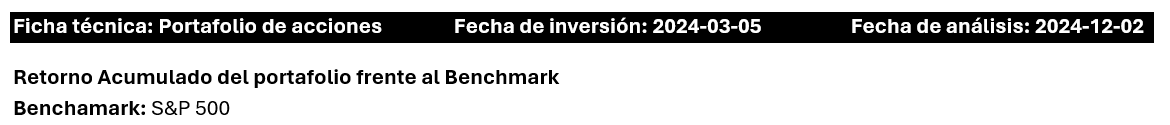
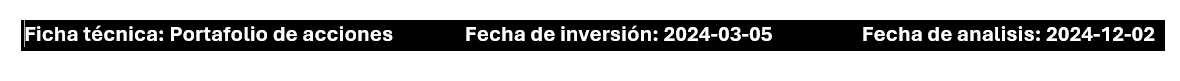
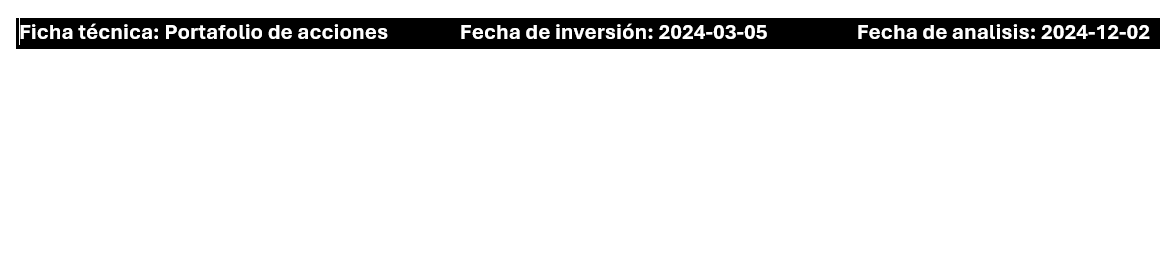

In [ ]:
## Creación de tablas con Python-Docx



In [37]:
# Convertir a objeto datetime
fecha5y = (datetime.strptime(fecha_analisis, "%Y-%m-%d") - relativedelta(years=5)).strftime("%Y-%m-%d")
fecha1y = (datetime.strptime(fecha_analisis, "%Y-%m-%d") - relativedelta(years=1)).strftime("%Y-%m-%d")
fecha1m = (datetime.strptime(fecha_analisis, "%Y-%m-%d") - relativedelta(months=1)).strftime("%Y-%m-%d")

In [38]:
def portafolio_byfecha(start_date, date_analisis, portfolio):

    activos = list(portfolio.keys())
    pesos = list(portfolio.values())

    df_activos = yf.download(activos, start=start_date, end=date_analisis)
    df_activos=df_activos['Close']

    benchmark = yf.download('VOO', start=start_date, end=date_analisis)
    benchmark =  benchmark['Close']

    df_activos['portafolio'] = df_activos.dot(pesos)


    monto_inicial = 100
    evol_100 = pd.DataFrame((df_activos['portafolio'] / df_activos['portafolio'].iloc[0]) * monto_inicial)
    evol_100['Benchmark']  =  (benchmark['VOO'] / benchmark['VOO'].iloc[0]) * monto_inicial

    returns = evol_100.pct_change().dropna()

    dict_resul  =  {'niveles 100': evol_100, 'retornos': returns }

    return dict_resul


In [39]:
portafolio_1m=portafolio_byfecha(fecha1m, fecha_analisis, portafolio)
portafolio_1y=portafolio_byfecha(fecha1y, fecha_analisis, portafolio)
portafolio_5y=portafolio_byfecha(fecha5y, fecha_analisis, portafolio)
portafolio_inv_inicial =portafolio_byfecha(fecha_inversion_inicial, fecha_analisis, portafolio)

[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  6 of 6 completed
[*********************100%***********************]  1 of 1 completed


In [40]:
def retornos_volatilidad(diccionario_datos):
    niveles = diccionario_datos['niveles 100']
    retornos = diccionario_datos['retornos']
    
    retorno_p = (niveles['portafolio'].iloc[-1] / niveles['portafolio'].iloc[0]) - 1
    retorno_B = (niveles['Benchmark'].iloc[-1] / niveles['Benchmark'].iloc[0]) - 1

    sigma_p = retornos['portafolio'].std() * np.sqrt(252)
    sigma_B = retornos['Benchmark'].std() * np.sqrt(252)

    años = niveles.shape[0] / 252

    if años > 1:

        retorno_p = (1+retorno_p)**(1/años) -1
        retorno_B = (1+retorno_B)**(1/años) -1
    else:

        retorno_p = (1+retorno_p)**(años) -1
        retorno_B = (1+retorno_B)**(años) -1

    dic_datos = {'rp_anualizado': str(round(retorno_p *100 , 2)) + "%",
             'rb_anualizado': str(round(retorno_B*100, 2)) + "%",
             'sigma_p_anual': str(round(sigma_p*100, 2)) + "%",  }

    return dic_datos


In [41]:
retornos_vol_1m = retornos_volatilidad(portafolio_1m)
retornos_vol_1y = retornos_volatilidad(portafolio_1y)
retornos_vol_5y = retornos_volatilidad(portafolio_5y)
retornos_vol_inv_inicial = retornos_volatilidad(portafolio_inv_inicial)

In [42]:
table = doc.add_table(rows=4, cols=5, style='Table Grid')

In [43]:

datos_tabla1 = [
    ['', 'Acumulado', 'Ultimo mes', 'Ultimo año', 'Ultimos 5 años'],
    ['Retorno anualizado', retornos_vol_inv_inicial['rp_anualizado'], retornos_vol_1m['rp_anualizado'], retornos_vol_1y['rp_anualizado'], retornos_vol_5y['rp_anualizado']],
    ['Volatilidad anualizada', retornos_vol_inv_inicial['sigma_p_anual'], retornos_vol_1m['sigma_p_anual'], retornos_vol_1y['sigma_p_anual'], retornos_vol_5y['sigma_p_anual']],
    ['Retorno del benchmark', retornos_vol_inv_inicial['rb_anualizado'], retornos_vol_1m['rb_anualizado'], retornos_vol_1y['rb_anualizado'], retornos_vol_5y['rb_anualizado']]
]


datos_tabla1

# Asignar las listas a las filas de la tabla
for i, fila in enumerate(table.rows):
    for j, celda in enumerate(fila.cells):
        celda.text = datos_tabla1[i][j]




In [44]:
from docx.enum.text import WD_ALIGN_PARAGRAPH

table2 = doc.add_table(rows=1, cols=2)

# Acceder a las celdas de la tabla
cell_1 = table2.cell(0, 0)
cell_2 = table2.cell(0, 1)

# Definir el contenido para cada columna

cell1_paragraph = cell_1.paragraphs[0]
cell1_bold = cell1_paragraph.add_run(' \n  \nDescripción de la estrategía: ') 
cell1_bold.bold = True
cell1_normal = cell1_paragraph.add_run('El portafolio se encuentra compuesto en su mayoría por renta variable, en conjunto con instrumentos para seguir el comportamiento de otras materias primas. El portafolio es de alto riesgo, al incluir en su mayoría instrumentos de renta variable. El portafolio posee una exposición a múltiples monedas, al igual que posee activos de renta variable de múltiples países y de múltiples sectores.')

cell1_paragraph.alignment = WD_ALIGN_PARAGRAPH.JUSTIFY


#Parrafo 2
cell1_paragraph2 = cell_1.add_paragraph()
cell1_bold2 = cell1_paragraph2.add_run('Sharpe ratio: {{sharpe}} \nNumero de activos: {{n_activos}}  \nVaR(95% 1-año): {{VaR}} \nTasa de captura de PyG: {{PyG}} ')
cell1_bold2.bold = True

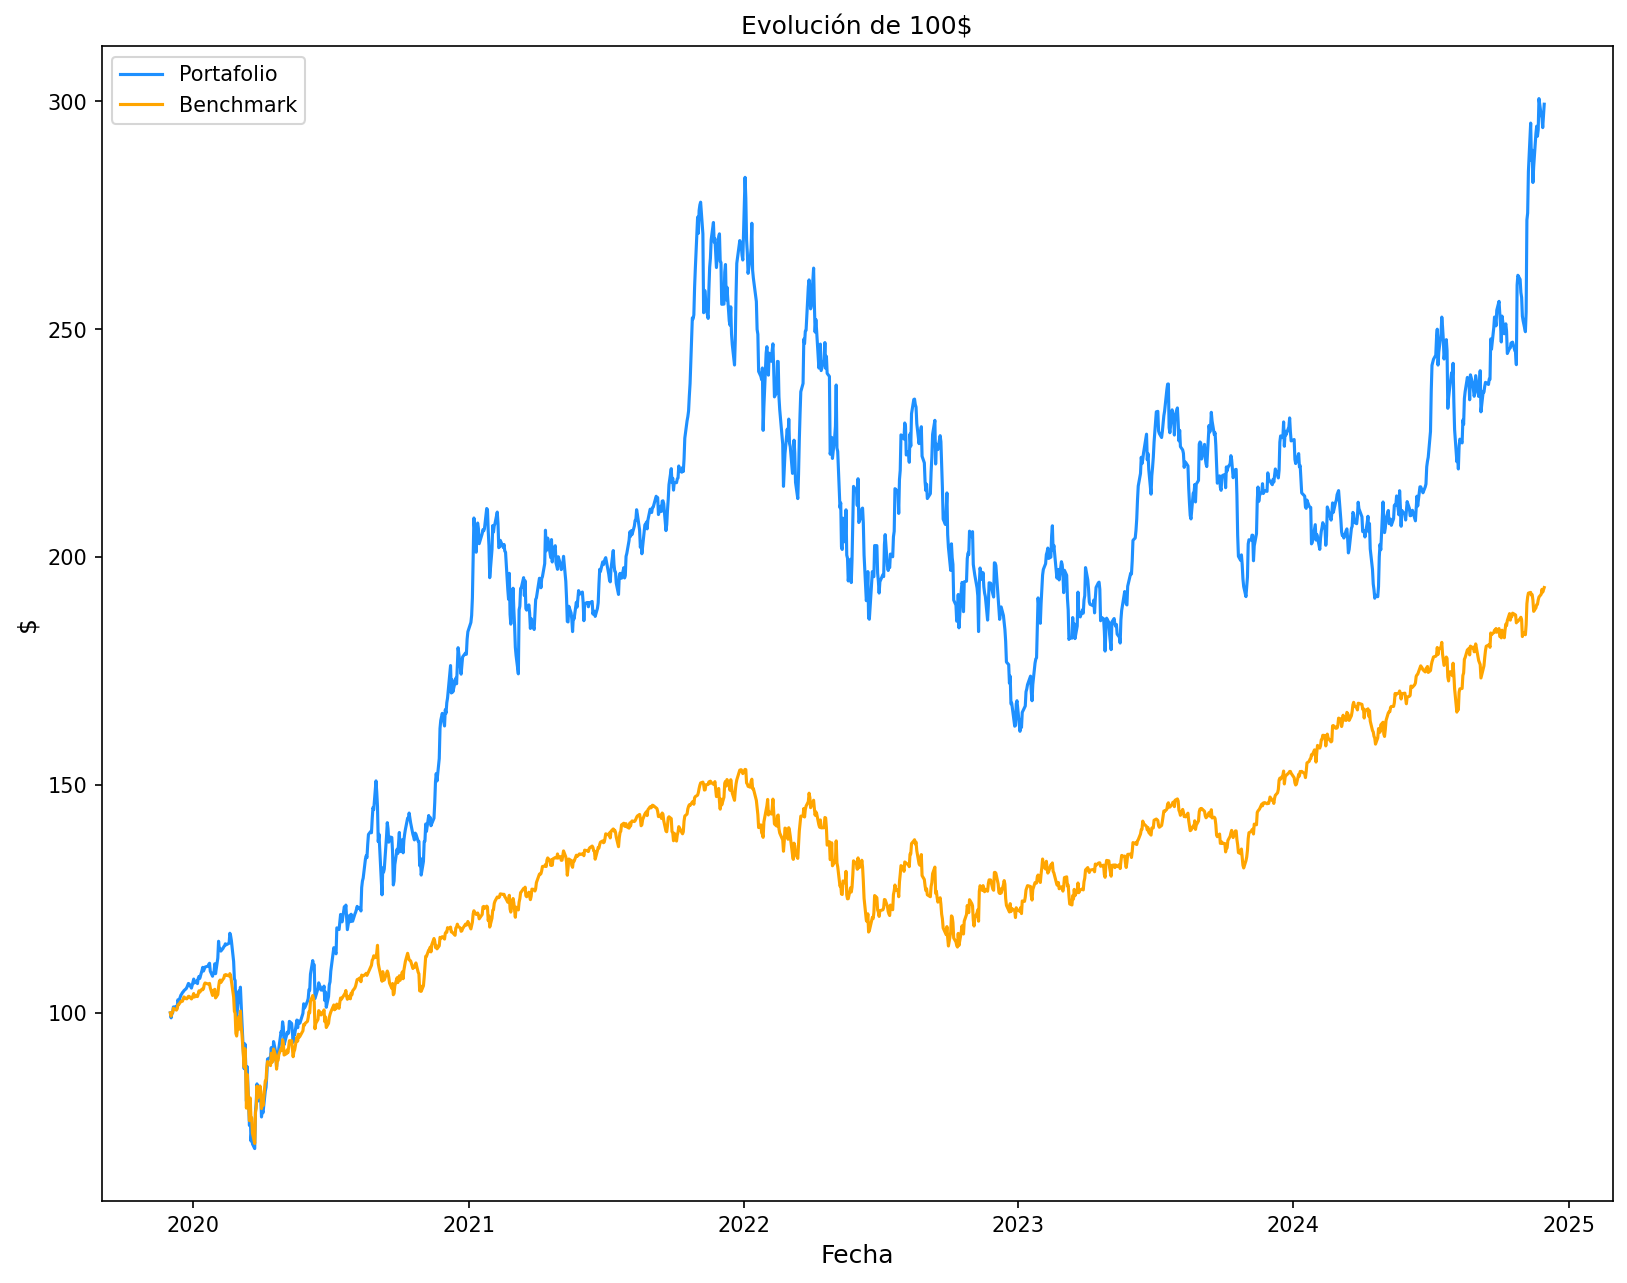

In [45]:
evol_100= portafolio_5y['niveles 100']

# Establecememos tamaño de la figura
fig, ax = plt.subplots(dpi=150, figsize=(13,10))

# Inficamos un Gráfico de barras con los datos obtenidos del groupby y seleccionamos color de preferencia
ax.plot(evol_100.index,evol_100['portafolio'], color='dodgerblue', label='Portafolio')
ax.plot(evol_100.index,evol_100['Benchmark'], color='orange', label = 'Benchmark')


# Nombre del eje x Y tamaño  de latra 12
plt.xlabel('Fecha', fontsize=12)

# Nombre del eje y Y tamaño  de latra 12
plt.ylabel('$', fontsize=12)

# Titulo del gráfico con tamaño de letra 18
plt.title('Evolución de 100$' , loc="center")
plt.savefig('evol100.png', bbox_inches="tight")

#
plt.legend()

plt.show()

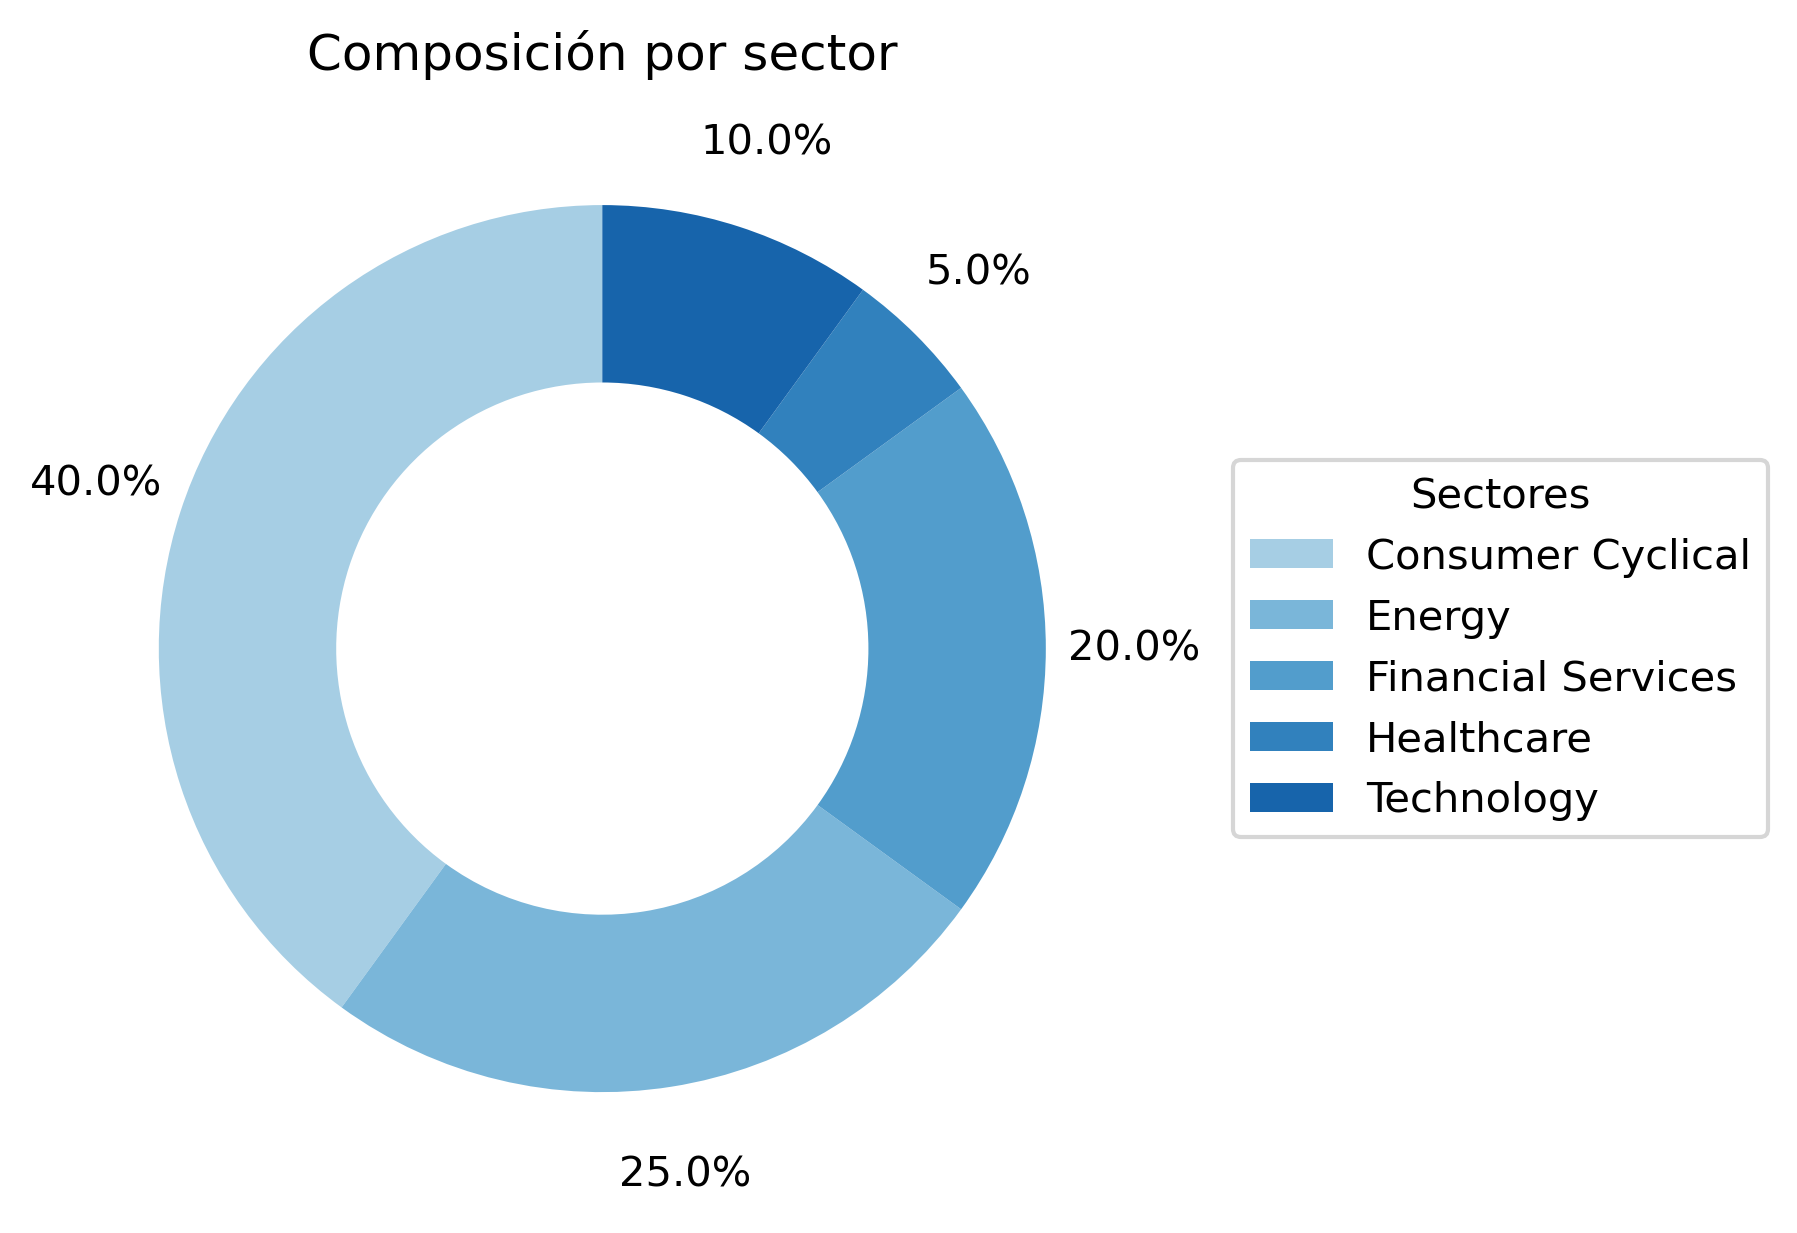

In [46]:
lista = []

for i in  portafolio:
    
    list_pesos = [yf.Ticker(i).info['sector'],portafolio[i]]
    lista.append(list_pesos)

sector_distribution = pd.DataFrame(lista, columns=['Sector', 'Peso'])


sector_distribution = sector_distribution.groupby(by='Sector').sum()

# Crear el gráfico de pastel
fig, ax = plt.subplots(dpi=300)

# Crear un colormap de tonos azules
colors = plt.cm.Blues(np.linspace(0.35, 0.8, len(sector_distribution)))

# Crear el gráfico de pastel
wedges, texts, autotexts=ax.pie(sector_distribution['Peso'], 
       autopct='%1.1f%%', 
       colors=colors,
       wedgeprops={'width': 0.4},
       startangle=90, pctdistance=1.2)

labels = sector_distribution.index
ax.legend(wedges, labels, title="Sectores", loc="center left", bbox_to_anchor=(1.05, 0, 0.5, 1))


# Mostrar el gráfico
plt.title("Composición por sector", loc="center")
plt.savefig('comp_sector.png', bbox_inches="tight")

plt.show()

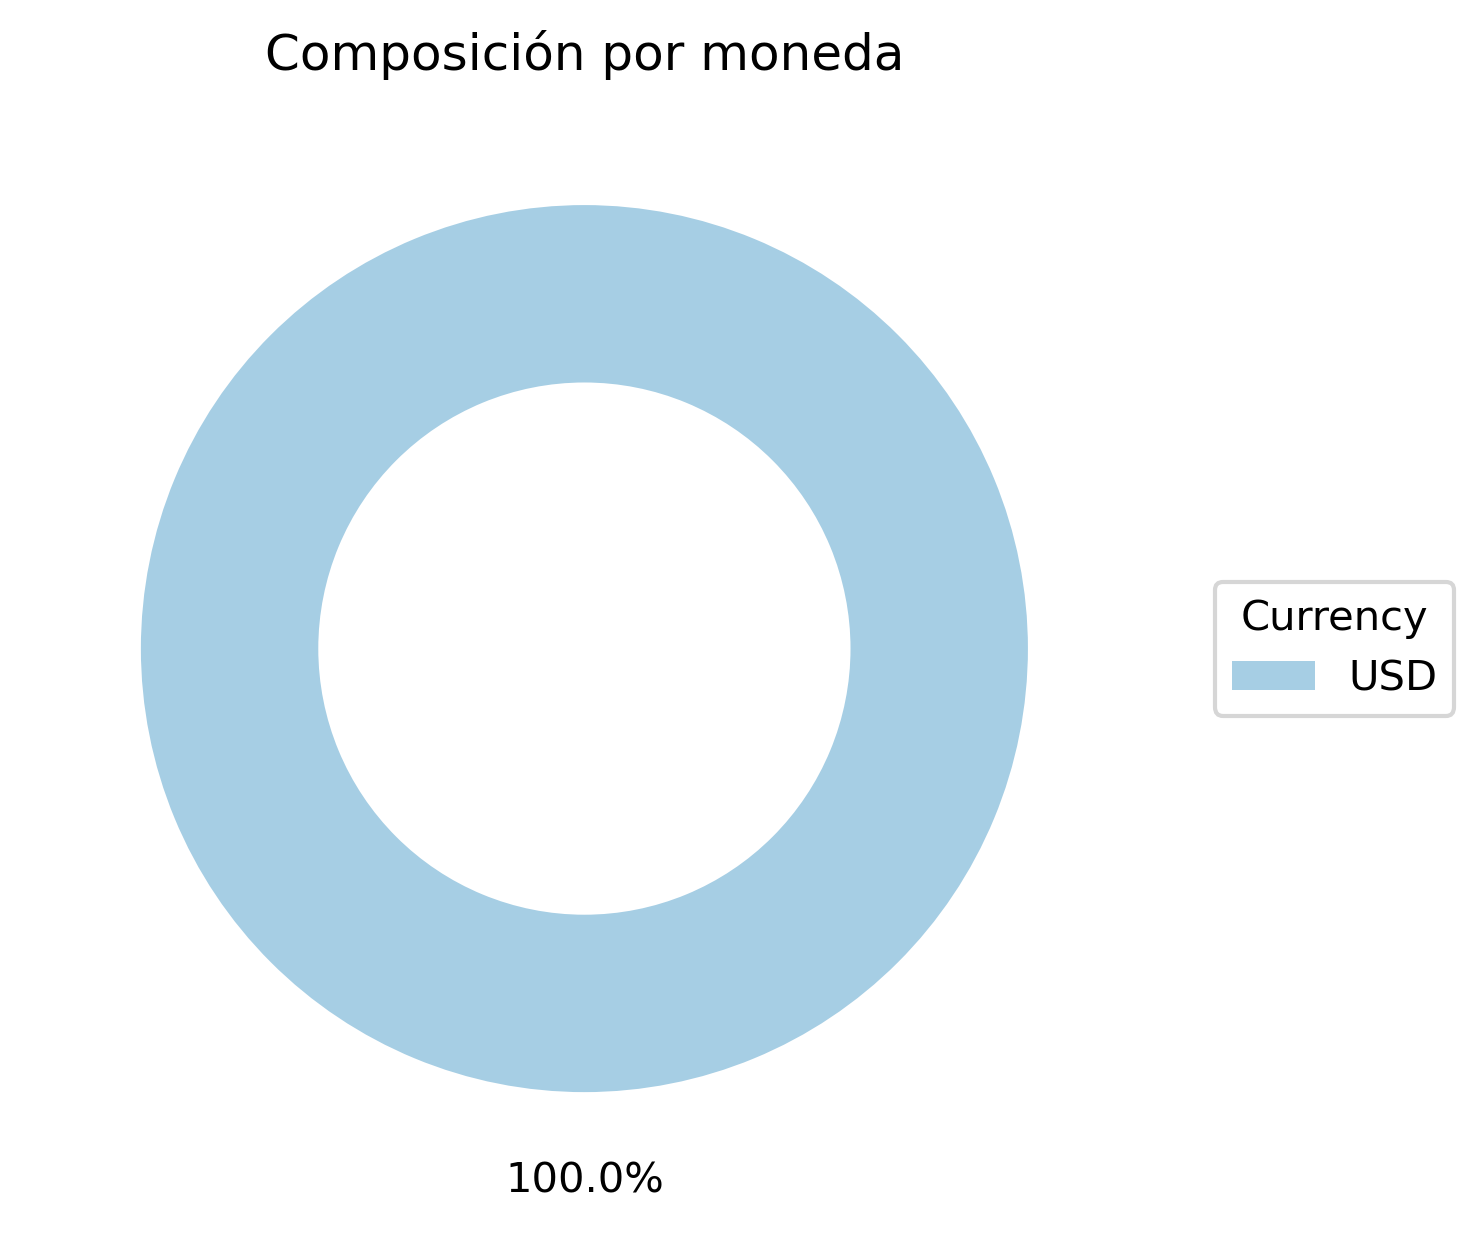

In [47]:

# Moneda
lista= []

for i in  portafolio:
    
    list_pesos = [yf.Ticker(i).info['currency'],portafolio[i]]
    lista.append(list_pesos)

currency_distribution = pd.DataFrame(lista, columns=['Currency', 'Peso'])

currency_distribution = currency_distribution.groupby(by='Currency').sum()

# Crear el gráfico de pastel
fig, ax = plt.subplots(dpi=300, )

# Crear un colormap de tonos azules
colors = plt.cm.Blues(np.linspace(0.35, 0.8, len(currency_distribution)))

# Crear el gráfico de pastel
wedges, texts, autotexts=ax.pie(currency_distribution['Peso'], 
       autopct='%1.1f%%', 
       colors=colors,
       wedgeprops={'width': 0.4},
       startangle=90, pctdistance=1.2)

labels = currency_distribution.index
ax.legend(wedges, labels, title="Currency", loc="center left", bbox_to_anchor=(1.05, 0, 0.5, 1))


# Mostrar el gráfico
plt.title("Composición por moneda", loc="center")
plt.savefig('comp_moneda.png', bbox_inches="tight")
plt.show()

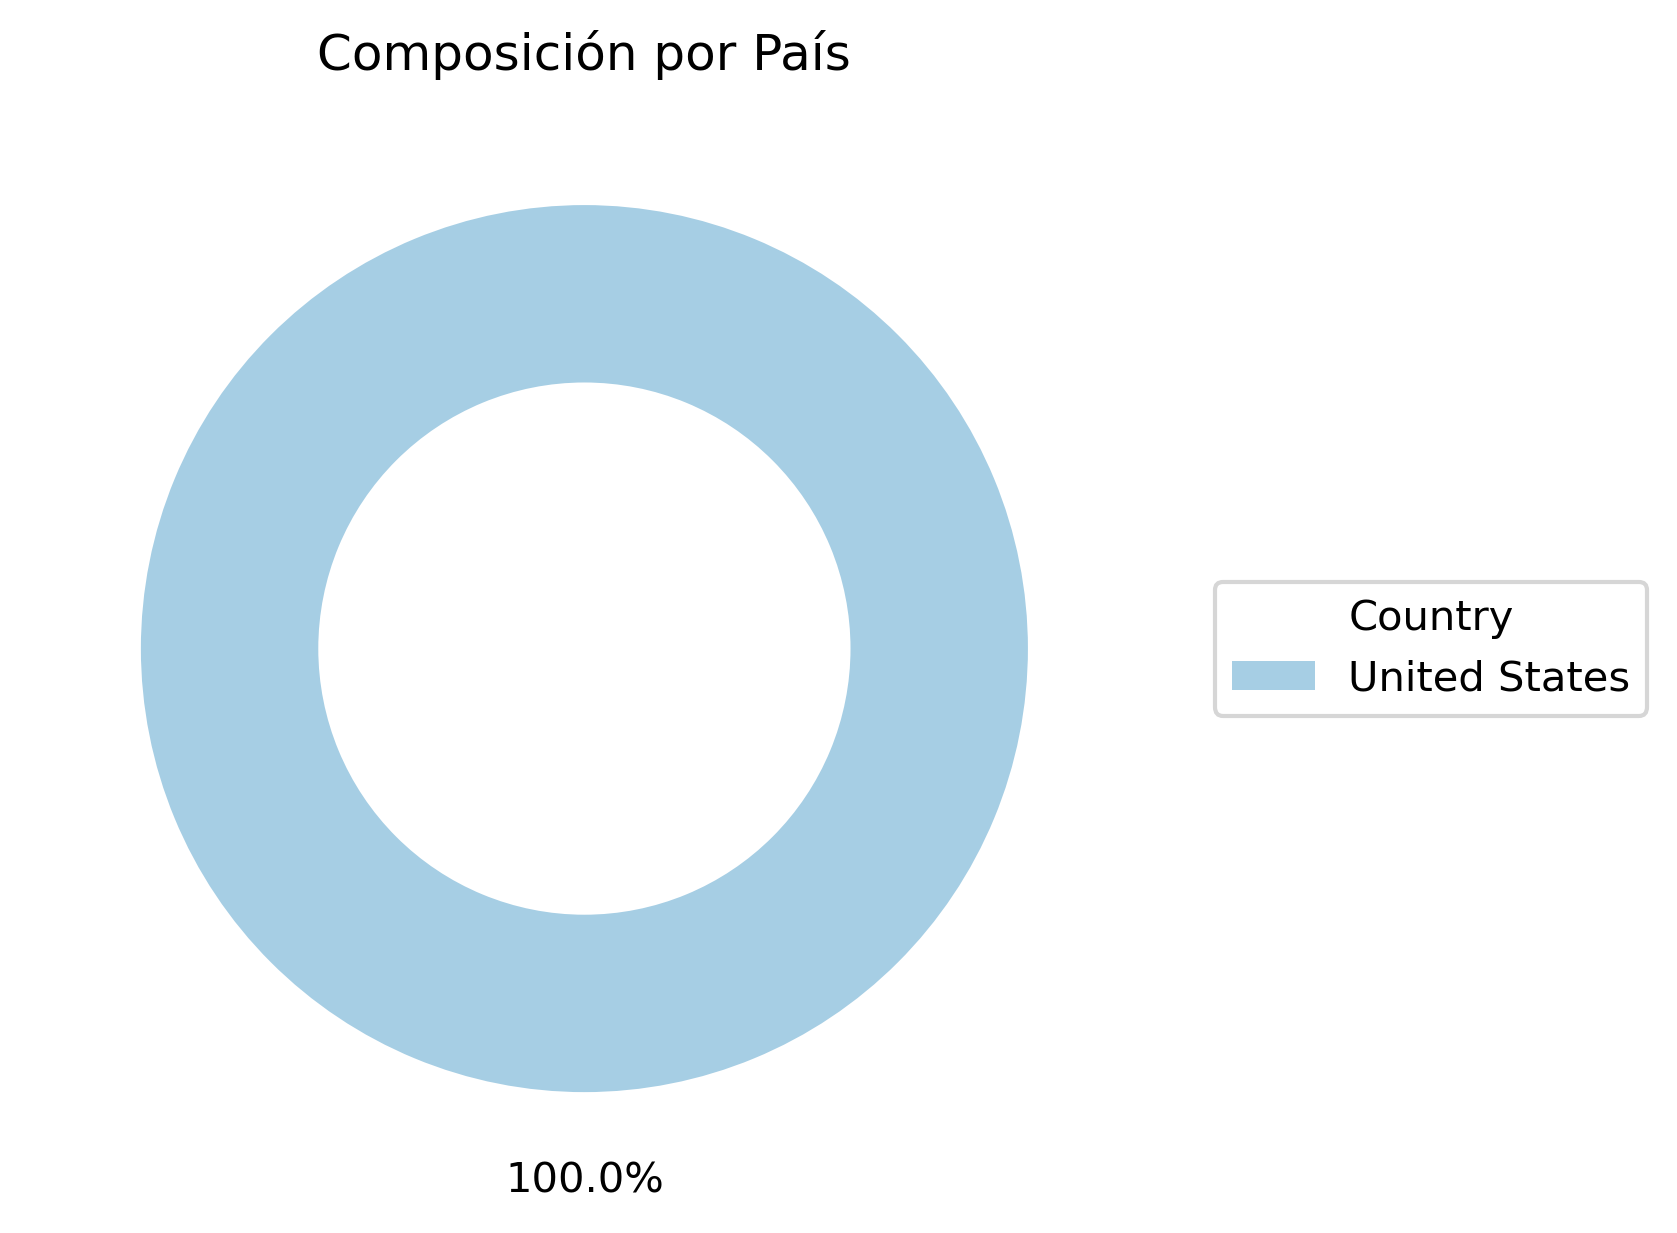

In [48]:
lista=[]

for i in  portafolio:
    
    list_pesos = [yf.Ticker(i).info['country'],portafolio[i]]
    lista.append(list_pesos)

country_distribution = pd.DataFrame(lista, columns=['country', 'Peso'])

country_distribution = country_distribution.groupby(by='country').sum()


# Crear el gráfico de pastel
fig, ax = plt.subplots(dpi=300)

# Crear un colormap de tonos azules
colors = plt.cm.Blues(np.linspace(0.35, 0.8, len(country_distribution)))

# Crear el gráfico de pastel
wedges, texts, autotexts=ax.pie(country_distribution['Peso'], 
       autopct='%1.1f%%', 
       colors=colors,
       wedgeprops={'width': 0.4},
       startangle=90, pctdistance=1.2)

labels = country_distribution.index
ax.legend(wedges, labels, title="Country", loc="center left", bbox_to_anchor=(1.05, 0, 0.5, 1))


# Mostrar el gráfico
plt.title("Composición por País", loc="center")
plt.savefig('comp_pais.png',bbox_inches="tight")
plt.show()

In [49]:
    paragraph_in_cell2 = cell_2.add_paragraph()
    run_in_cell2 = paragraph_in_cell2.add_run()
    run_in_cell2.add_picture("evol100.png", width=Inches(4))

In [50]:
paragraph2_in_cell2 = cell_2.add_paragraph()
run2_in_cell2 = paragraph2_in_cell2.add_run()
run2_in_cell2.add_picture("comp_sector.png", width=Inches(4))

In [51]:
doc.add_page_break()

table2 = doc.add_table(rows=1, cols=2)

# Acceder a las celdas de la tabla
cell_1_2 = table2.cell(0, 0)
cell_2_2 = table2.cell(0, 1)

In [52]:
    paragraph_in_cell1_2 = cell_1_2.add_paragraph()
    run2_in_cell1_2 = paragraph_in_cell1_2 .add_run()
    run2_in_cell1_2.add_picture("comp_pais.png", width=Inches(4))

In [53]:
    paragraph_in_cell2_2 = cell_2_2.add_paragraph()
    run2_in_cell_2_2 = paragraph_in_cell2_2.add_run()
    run2_in_cell_2_2.add_picture("comp_moneda.png", width=Inches(4))

In [54]:
datos4 = [(clave, str(valor*100) + "%") for clave, valor in portafolio.items()]

In [55]:
datos4.append(("Total", '100%'))

In [56]:
### Tabla 4

tabla4 = doc.add_table(rows=len(datos4), cols=2, style='Table Grid')

tabla4.alignment = 1   # Tabla en el centro del documento.


# Asignar las listas a las filas de la tabla
for i, fila in enumerate(tabla4.rows):
    for j, celda in enumerate(fila.cells):
        celda.text = datos4[i][j]

for row in tabla4.rows:
    for cell in row.cells:
        cell.width = 1000000  # Cambia este valor para ajustar el ancho

# Agregar sombreado a la primera fila (encabezados)
def agregar_sombreado(fila):
    for celda in fila.cells:
        # Acceder al XML de la celda
        celda_xml = celda._element
        # Acceder o crear las propiedades de la celda (w:tcPr)
        tc_pr = celda_xml.find(qn('w:tcPr'))
        if tc_pr is None:
            tc_pr = OxmlElement('w:tcPr')
            celda_xml.insert(0, tc_pr)
        # Crear un elemento de sombreado
        sombreado = OxmlElement('w:shd')
        sombreado.set(qn('w:fill'), '3498DB')  # Código de color hexadecimal (gris claro)
        tc_pr.append(sombreado)

# Aplicar sombreado a la primera fila
agregar_sombreado(tabla4.rows[0])



In [57]:
# Guardar el documento
doc.save('d.docx')
os.startfile("d.docx")